### web crawling
- 1. requests : json : 동적페이지(URL 변경 없이 웹페이지 내용이 변경(ex. 더보기)) : 
    - naver stock, zigbang
- 2. requests : html : 정적페이지(URL 변경으로 웹피이지 내용이 변경) : gmarket
- 3. selenium : web browser : 1, 2번 방법을 사용하지 못할때 사용

#### 1. 네이버 주가 데이터 크롤링
- 코스피, 코스닥 데이터
    - 로그인 없이 크롤링 가능
- USD 환율 데이터
    - 로그인 해야 크롤링 가능
    - header에 cookie 값을 적용해서 requests를 실행
- 그래프 그리기
- 정규화: min, max, scale을 사용
- 상관계수

#### 크롤링 절차
- 1. 웹 서비스 분석: URL을 알아내기
- 2. request, response 하기: json 포멧의 str 데이터
- 3. json(str) > dict > dataframe

In [ ]:
# 1. 웹 서비스 분석: URL 알아내기

In [3]:
# code: "KOSPI", "KOSDAQ"
code, pageSize, page = "KOSPI", 20, 5

url = "https://m.stock.naver.com/api/json/sise/dailySiseIndexListJson.nhn?code={}&pageSize={}&page={}".format(code, pageSize, page)

In [6]:
# 2. request, response 하기: json 포멧

In [7]:
response = requests.get(url)
response

<Response [200]>

In [10]:
response.text # response.content

'{"result":{"siseList":[{"cd":"KOSPI","dt":"20200703","ncv":2152.41,"cv":17.04,"cr":0.8,"ov":2147.89,"hv":2153.54,"lv":2135.3},{"cd":"KOSPI","dt":"20200702","ncv":2135.37,"cv":28.67,"cr":1.36,"ov":2116.72,"hv":2135.37,"lv":2113.98},{"cd":"KOSPI","dt":"20200701","ncv":2106.7,"cv":-1.63,"cr":-0.08,"ov":2128.81,"hv":2133.55,"lv":2101.33},{"cd":"KOSPI","dt":"20200630","ncv":2108.33,"cv":14.85,"cr":0.71,"ov":2124.38,"hv":2134.38,"lv":2108.26},{"cd":"KOSPI","dt":"20200629","ncv":2093.48,"cv":-41.17,"cr":-1.93,"ov":2105.54,"hv":2120.5,"lv":2087.84},{"cd":"KOSPI","dt":"20200626","ncv":2134.65,"cv":22.28,"cr":1.05,"ov":2137.47,"hv":2142.04,"lv":2115.25},{"cd":"KOSPI","dt":"20200625","ncv":2112.37,"cv":-49.14,"cr":-2.27,"ov":2130.45,"hv":2143.33,"lv":2112.37},{"cd":"KOSPI","dt":"20200624","ncv":2161.51,"cv":30.27,"cr":1.42,"ov":2145.93,"hv":2171.86,"lv":2143.91},{"cd":"KOSPI","dt":"20200623","ncv":2131.24,"cv":4.51,"cr":0.21,"ov":2149.13,"hv":2158.15,"lv":2110.51},{"cd":"KOSPI","dt":"20200622","

In [11]:
# 3. json(str) > dict > dataframe

In [16]:
# dir(response)
datas = response.json()["result"]["siseList"]

In [18]:
kospi_df = pd.DataFrame(datas)
kospi_df

,cd,cr,cv,dt,hv,lv,ncv,ov
0,KOSPI,0.80,17.04,20200703,2153.54,2135.30,2152.41,2147.89
1,KOSPI,1.36,28.67,20200702,2135.37,2113.98,2135.37,2116.72
2,KOSPI,-0.08,-1.63,20200701,2133.55,2101.33,2106.70,2128.81
3,KOSPI,0.71,14.85,20200630,2134.38,2108.26,2108.33,2124.38
4,KOSPI,-1.93,-41.17,20200629,2120.50,2087.84,2093.48,2105.54
5,KOSPI,1.05,22.28,20200626,2142.04,2115.25,2134.65,2137.47
6,KOSPI,-2.27,-49.14,20200625,2143.33,2112.37,2112.37,2130.45
7,KOSPI,1.42,30.27,20200624,2171.86,2143.91,2161.51,2145.93
8,KOSPI,0.21,4.51,20200623,2158.15,2110.51,2131.24,2149.13
9,KOSPI,-0.68,-14.59,20200622,2142.88,2122.10,2126.73,2126.38


In [34]:
# 함수로 만들기

def naver_stock(code="KOSPI", page_size=20, page=5):
    url = "https://m.stock.naver.com/api/json/sise/dailySiseIndexListJson.nhn?code={}&pageSize={}&page={}".format(code, page_size, page)
    response = requests.get(url)
    return pd.DataFrame(response.json()["result"]["siseList"])

In [98]:
kospi_df = naver_stock(page_size=100,page=5)
print(len(kospi_df))
kospi_df.tail(4)

100


,cd,cr,cv,dt,hv,lv,ncv,ov
96,KOSPI,-1.75,-36.15,20181026,2066.57,2008.86,2027.15,2066.57
97,KOSPI,-1.63,-34.28,20181025,2066.06,2033.81,2063.30,2046.67
98,KOSPI,-0.40,-8.52,20181024,2121.36,2092.10,2097.58,2119.19
99,KOSPI,-2.57,-55.61,20181023,2148.80,2094.69,2106.10,2147.30


In [97]:
kosdaq_df = naver_stock("KOSDAQ", page_size=100)
kosdaq_df.tail(4)

,cd,cr,cv,dt,hv,lv,ncv,ov
96,KOSDAQ,-3.46,-23.77,20181026,694.37,658.11,663.07,694.37
97,KOSDAQ,-1.78,-12.46,20181025,693.07,672.17,686.84,678.49
98,KOSDAQ,-2.74,-19.70,20181024,729.89,697.13,699.30,727.07
99,KOSDAQ,-3.38,-25.15,20181023,742.45,716.85,719.00,740.35


In [ ]:
# USD 데이터 크롤링: cookie 데이터 추가

In [ ]:
# 1. 웹 페이지 분석: URL

In [37]:
code, page_size, page = "FX_USDKRW", 20, 5
url = "https://m.stock.naver.com/api/json/marketindex/marketIndexDay.nhn?marketIndexCd={}&pageSize={}&page={}".format(code, page_size, page)

In [ ]:
# 2. request, response: json

In [41]:
# cookie 데이터 추가
params = {
    "cookie": "NNB=E6IWAM2B6WGF6; NRTK=ag#all_gr#1_ma#-2_si#0_en#0_sp#0; nx_ssl=2; MM_NEW=1; NFS=2; MM_NOW_COACH=1; nid_inf=806554524; NID_AUT=o2dDPZgM5DQzksuYv2fHI9Nv+xXjJVQ70rIiXeNHJ6k2fi9t0725pMb5l3a2+aSn; NID_JKL=1TGLYO644toCORSANpBoRCGrhVqnuMAmghdpcxkFG2Y=; _ga=GA1.2.1552150491.1603846172; m_loc=27e97b2679829872d6869c9ec5d1a7e345bc753a4bc1bd184646eec03a478c78; NID_SES=AAABrlBVM8pBL46lvgeciG9xzv5wH7vGQqS8Tut580cR3i2rE/P1UhQ3fteBLURw44OHfX88ISKDVMhnSflHxI3FgI9jpQ3S7OhQu1DwQhZ7h0AJHQ31TiQ24vuFxq0Yhc4E1GtmQN1bxPzcPTjzOiw3DYLmxpmR1kKFKrMQHfu3Ivr2Duck6OtK5bcIuILTJby8UlxfPqfIs0sqgAweE3DZrYw5UJ9ueDdVb1pWCqrMcMMTBEP9yXZR/xURWh9pciFWAjvqRw1o+/zN1OpcJcgi0phxtvKMAb0U1fwDqQNug8xvA0pJukLfyJ4PIyI/P7A/KqPFgYAjsUfdtk0kDwGUA/GKS/CLmhts9iLoiRuF5sNdL7d/K/5Nry4X/HivmXRg1l1DBOMckQOeCtQ34MIqjrFlc/lX+N5o7gNoWusKaceA6ENCdPXYEWOSlKZR7Wr1NQMjLPJ57ROQDInqi0WKPrXN8IE1DntKM6z8rDlKrEl0d81AHFzwj848+pcPJpqZLjL9gCd3N7gUv5ffsJghihtE/bU8o9iMhlHuAMFza+XxpNcbrw+m72r4+Jd95gPafw==; XSRF-TOKEN=356f2453-5420-4cc1-9953-b95f785834da; JSESSIONID=6B97510401501EA674C9A4D67CA3E8B5; BMR="
}
response = requests.get(url, headers = params)
response.text

'{"result":{"marketIndexDay":[{"dt":"20200703","nv":1199.5,"cv":0.5,"cr":0.04,"cbv":1220.49,"csv":1178.51,"sv":1211.2,"rv":1187.8},{"dt":"20200702","nv":1199.0,"cv":-4.5,"cr":-0.37,"cbv":1219.98,"csv":1178.02,"sv":1210.7,"rv":1187.3},{"dt":"20200701","nv":1203.5,"cv":0.5,"cr":0.04,"cbv":1224.56,"csv":1182.44,"sv":1215.2,"rv":1191.8},{"dt":"20200630","nv":1203.0,"cv":2.5,"cr":0.21,"cbv":1224.05,"csv":1181.95,"sv":1214.7,"rv":1191.3},{"dt":"20200629","nv":1200.5,"cv":-3.5,"cr":-0.29,"cbv":1221.5,"csv":1179.5,"sv":1212.2,"rv":1188.8},{"dt":"20200626","nv":1204.0,"cv":0.5,"cr":0.04,"cbv":1225.07,"csv":1182.93,"sv":1215.7,"rv":1192.3},{"dt":"20200625","nv":1203.5,"cv":1.0,"cr":0.08,"cbv":1224.56,"csv":1182.44,"sv":1215.2,"rv":1191.8},{"dt":"20200624","nv":1202.5,"cv":-6.5,"cr":-0.54,"cbv":1223.54,"csv":1181.46,"sv":1214.2,"rv":1190.8},{"dt":"20200623","nv":1209.0,"cv":-5.0,"cr":-0.41,"cbv":1230.15,"csv":1187.85,"sv":1220.8,"rv":1197.2},{"dt":"20200622","nv":1214.0,"cv":4.5,"cr":0.37,"cbv":1

In [ ]:
# 3. json

In [45]:
datas = response.json()["result"]["marketIndexDay"]
usd_df = pd.DataFrame(datas)

In [84]:
def get_usd(code="FX_USDKRW", page_size=20, page=5):
    url = "https://m.stock.naver.com/api/json/marketindex/marketIndexDay.nhn?marketIndexCd={}&pageSize={}&page={}".format(code, page_size, page)
    params = {
        "cookie": "NNB=E6IWAM2B6WGF6; NRTK=ag#all_gr#1_ma#-2_si#0_en#0_sp#0; nx_ssl=2; MM_NEW=1; NFS=2; MM_NOW_COACH=1; nid_inf=806554524; NID_AUT=o2dDPZgM5DQzksuYv2fHI9Nv+xXjJVQ70rIiXeNHJ6k2fi9t0725pMb5l3a2+aSn; NID_JKL=1TGLYO644toCORSANpBoRCGrhVqnuMAmghdpcxkFG2Y=; _ga=GA1.2.1552150491.1603846172; m_loc=27e97b2679829872d6869c9ec5d1a7e345bc753a4bc1bd184646eec03a478c78; NID_SES=AAABrlBVM8pBL46lvgeciG9xzv5wH7vGQqS8Tut580cR3i2rE/P1UhQ3fteBLURw44OHfX88ISKDVMhnSflHxI3FgI9jpQ3S7OhQu1DwQhZ7h0AJHQ31TiQ24vuFxq0Yhc4E1GtmQN1bxPzcPTjzOiw3DYLmxpmR1kKFKrMQHfu3Ivr2Duck6OtK5bcIuILTJby8UlxfPqfIs0sqgAweE3DZrYw5UJ9ueDdVb1pWCqrMcMMTBEP9yXZR/xURWh9pciFWAjvqRw1o+/zN1OpcJcgi0phxtvKMAb0U1fwDqQNug8xvA0pJukLfyJ4PIyI/P7A/KqPFgYAjsUfdtk0kDwGUA/GKS/CLmhts9iLoiRuF5sNdL7d/K/5Nry4X/HivmXRg1l1DBOMckQOeCtQ34MIqjrFlc/lX+N5o7gNoWusKaceA6ENCdPXYEWOSlKZR7Wr1NQMjLPJ57ROQDInqi0WKPrXN8IE1DntKM6z8rDlKrEl0d81AHFzwj848+pcPJpqZLjL9gCd3N7gUv5ffsJghihtE/bU8o9iMhlHuAMFza+XxpNcbrw+m72r4+Jd95gPafw==; XSRF-TOKEN=356f2453-5420-4cc1-9953-b95f785834da; JSESSIONID=6B97510401501EA674C9A4D67CA3E8B5; BMR="
    }
    response = requests.get(url, headers = params)
    return pd.DataFrame(response.json()["result"]["marketIndexDay"])

In [99]:
usd_df = get_usd(page_size=100)
usd_df.tail(3)

,cbv,cr,csv,cv,dt,nv,rv,sv
97,1161.98,-0.04,1122.02,-0.5,20181029,1142.0,1130.9,1153.1
98,1162.49,0.40,1122.51,4.5,20181026,1142.5,1131.4,1153.6
99,1157.91,0.35,1118.09,4.0,20181025,1138.0,1126.9,1149.1


In [53]:
len(kospi_df), len(kosdaq_df), len(usd_df)

(100, 100, 100)

#### 그래프로 그리기

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
%matplotlib inline

In [65]:
sns.set()

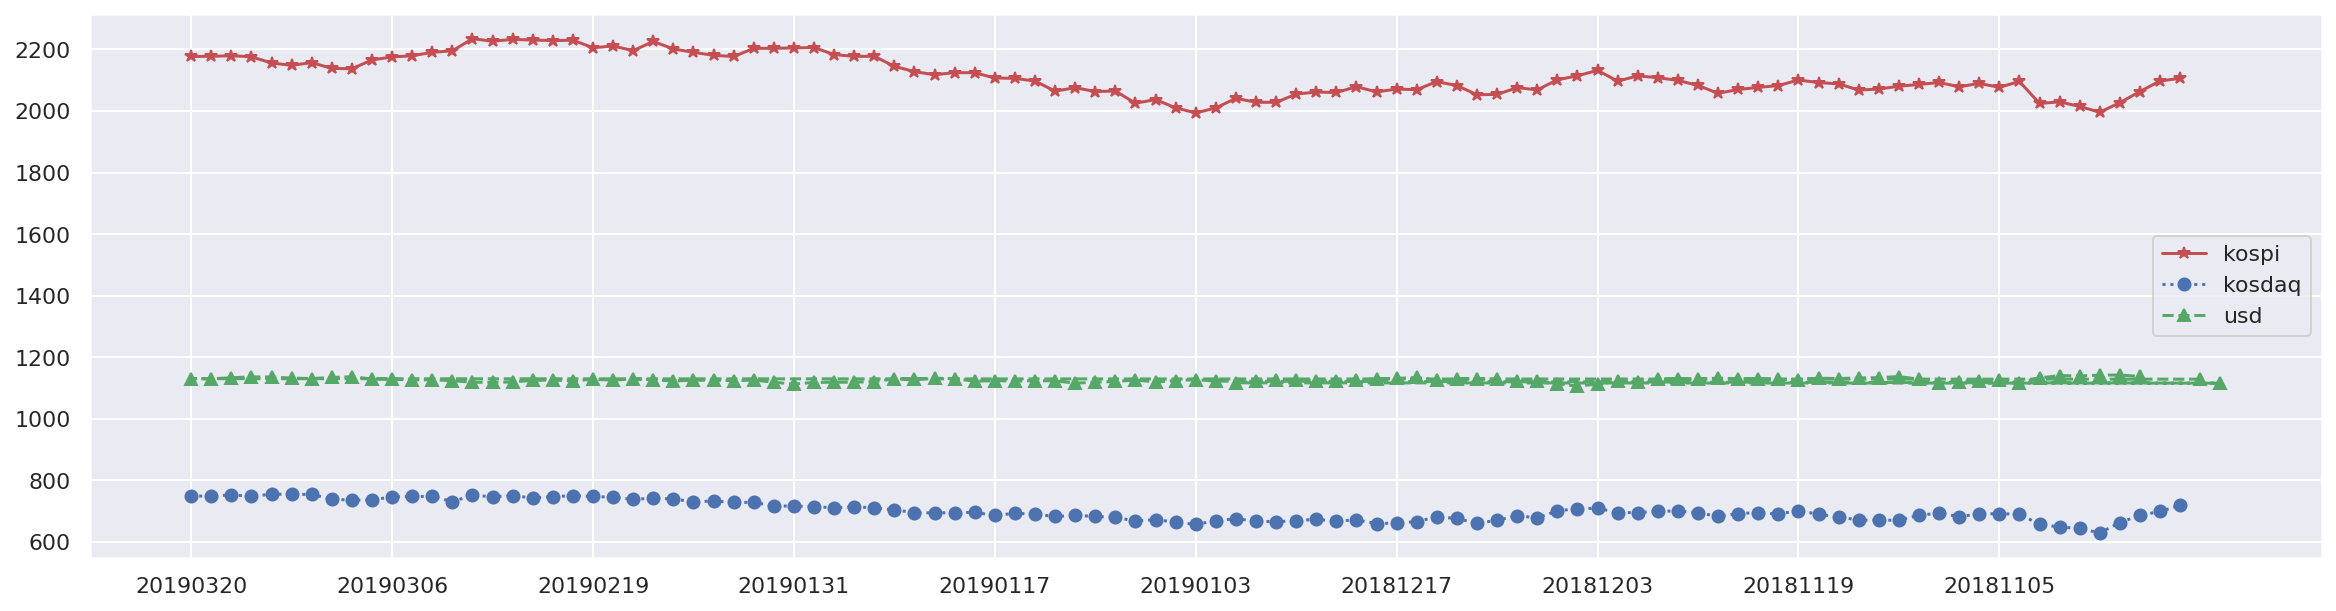

In [91]:
plt.figure(figsize=(20,5))

plt.plot(kospi_df["dt"], kospi_df["ncv"], "r*-", label="kospi")
plt.plot(kosdaq_df["dt"], kosdaq_df["ncv"], "bo:", label="kosdaq")
plt.plot(usd_df["dt"], usd_df["nv"], "g^--", label="usd")
plt.legend(loc=0)

step = len(kospi_df) // 10
plt.xticks(kospi_df[::step]["dt"])

plt.show()

#### 정규화: nomalization
- z = (x-min(x)) / (max(x) - min(x)) 

In [68]:
from sklearn import preprocessing

In [69]:
preprocessing.minmax_scale(kospi_df["ncv"])

array([0.76071177, 0.76286864, 0.77062508, 0.75660542, 0.67186528,
       0.64171056, 0.67808702, 0.59894645, 0.59620888, 0.71379983,
       0.75449002, 0.76954664, 0.81695632, 0.83678294, 1.        ,
       0.96602928, 0.99075034, 0.98220582, 0.97457381, 0.97913642,
       0.87904932, 0.9008669 , 0.83947903, 0.96291841, 0.86183583,
       0.81616824, 0.77576839, 0.76050438, 0.86988262, 0.87004853,
       0.87581401, 0.88141358, 0.78667717, 0.76154133, 0.7633249 ,
       0.6276909 , 0.55614086, 0.5146211 , 0.54299224, 0.54162346,
       0.47019785, 0.46621594, 0.4292173 , 0.29374922, 0.33958273,
       0.28860591, 0.29453731, 0.13094695, 0.18001576, 0.06864656,
       0.        , 0.06760961, 0.19635821, 0.14409557, 0.142312  ,
       0.25430337, 0.2811813 , 0.27549878, 0.35314613, 0.28375296,
       0.32100046, 0.31390767, 0.42245634, 0.36861753, 0.2458418 ,
       0.24924302, 0.34037082, 0.31104567, 0.44634784, 0.50043552,
       0.57335435, 0.42789   , 0.49939856, 0.47500933, 0.43850

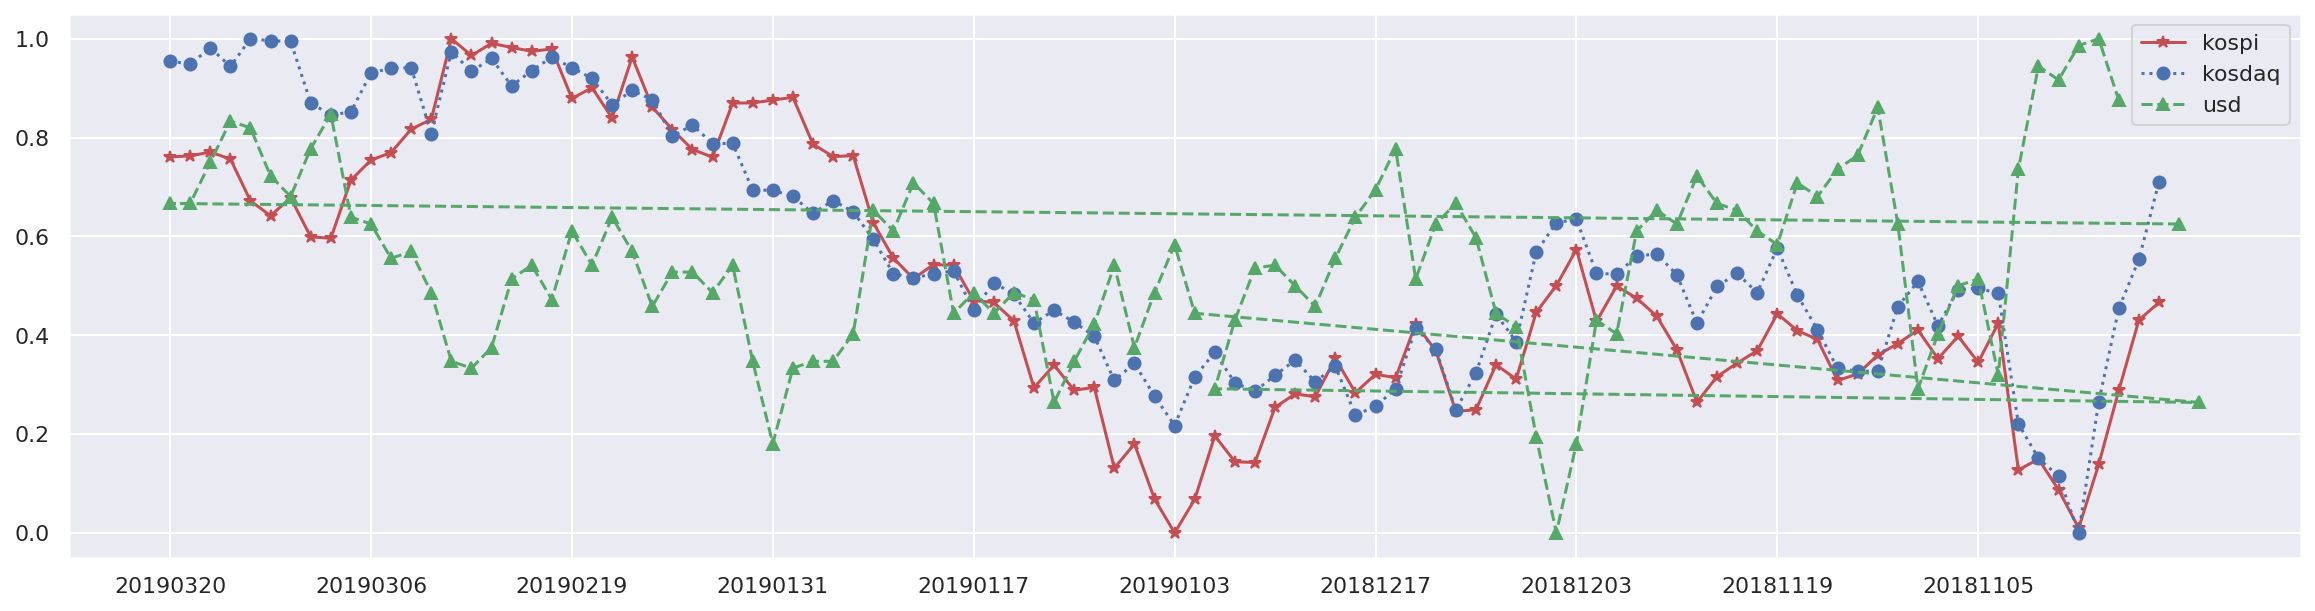

In [92]:
plt.figure(figsize=(20,5))

plt.plot(kospi_df["dt"], preprocessing.minmax_scale(kospi_df["ncv"]), "r*-", label="kospi")
plt.plot(kosdaq_df["dt"], preprocessing.minmax_scale(kosdaq_df["ncv"]), "bo:", label="kosdaq")
plt.plot(usd_df["dt"], preprocessing.minmax_scale(usd_df["nv"]), "g^--", label="usd")
plt.legend(loc=0)

step = len(kospi_df) // 10
plt.xticks(kospi_df[::step]["dt"])

plt.show()

#### 상관계수

In [74]:
import numpy as np

In [75]:
# 코스피, 코스닥
np.corrcoef(kospi_df["ncv"], kosdaq_df["ncv"])[0, 1]

0.9118812944422611

In [77]:
np.corrcoef(kospi_df["ncv"], usd_df["nv"])[0, 1]

0.29699706264396786